# == Projeto 23: Transfer Learning indoorCVPR_09 ==

## Etapa 1: Baixando e descompactando as imagens

In [1]:
!wget http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar

--2021-03-02 21:04:24--  http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar
Resolving groups.csail.mit.edu (groups.csail.mit.edu)... 128.30.2.44
Connecting to groups.csail.mit.edu (groups.csail.mit.edu)|128.30.2.44|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2592010240 (2.4G) [application/x-tar]
Saving to: ‘indoorCVPR_09.tar’

indoorCVPR_09.tar   100%[===================>]   2.41G  5.66MB/s    in 7m 6s   

2021-03-02 21:11:31 (5.80 MB/s) - ‘indoorCVPR_09.tar’ saved [2592010240/2592010240]



In [2]:
!tar -xvf indoorCVPR_09.tar

Streaming output truncated to the last 5000 lines.
Images/mall/cover_home3.jpg
Images/mall/CP67791.jpg
Images/mall/crocker_galleria_735089.jpg
Images/mall/mall1.jpg
Images/mall/d8.jpg
Images/mall/deira_city_centre_dubai_08.jpg
Images/mall/dungarv_new_mall.jpg
Images/mall/latham_circle_mall_16.jpg
Images/mall/eastridg1.jpg
Images/mall/IMG_6449.jpg
Images/mall/main_boutique_b.jpg
Images/mall/easyfranchise_centre_commercial_1.jpg
Images/mall/ins42.jpg
Images/mall/mall14.jpg
Images/mall/eaton_centre_2001_03.jpg
Images/mall/ins43.jpg
Images/mall/mall17.jpg
Images/mall/full_shopping_Central_1.jpg
Images/mall/galleria.jpg
Images/mall/galleria1.jpg
Images/mall/galleria2.jpg
Images/mall/Galleria_003.jpg
Images/mall/laurel_mall_06.jpg
Images/mall/Galleria_1.jpg
Images/mall/galleria_san_federico_nr_109_2_n1.jpg
Images/mall/ins23.jpg
Images/mall/ins44.jpg
Images/mall/mall18.jpg
Images/mall/galleria_vittorio_emanuele_ii_milan_mlgalar.jpg
Images/mall/ins45.jpg
Images/mall/mall19.jpg
Images/mall/GUM_

## Etapa 2: Preparando as pastas dos datasets

In [3]:
import os

n_files_folder = [len(files) for root, dir, files in os.walk('Images') if len(files) > 0]
folders = [dirs for root, dirs, files in os.walk('Images') if len(dirs) > 0][0]

n_files_folder[:5], folders[:5]

([346, 155, 107, 166, 513],
 ['corridor', 'stairscase', 'library', 'tv_studio', 'restaurant'])

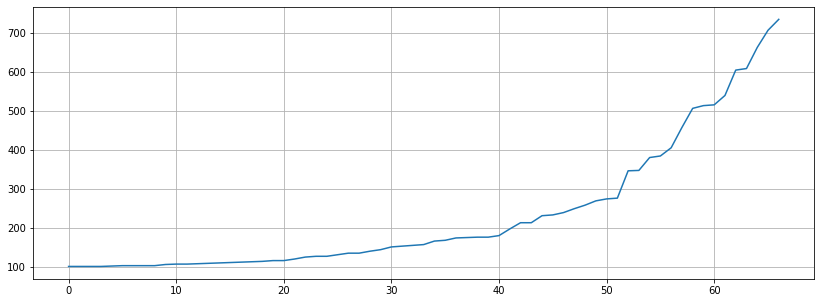

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(sorted(n_files_folder))
plt.grid();

In [5]:
import numpy as np

sum(np.array(n_files_folder) > 600)

5

In [6]:
mask = np.array(n_files_folder) > 600
keep_folders = list(np.array(folders)[mask])
keep_folders

['bar', 'airport_inside', 'bedroom', 'kitchen', 'livingroom']

In [7]:
import shutil
[shutil.rmtree('Images/' + folder) for folder in folders if folder not in keep_folders];

In [8]:
n_files_folder = [len(files) for root, dir, files in os.walk('Images') if len(files) > 0]
folders = [dirs for root, dirs, files in os.walk('Images') if len(dirs) > 0][0]
filenames = [os.listdir('Images/' + folder) for folder in folders]

n_files_folder, folders, filenames

([604, 608, 662, 734, 706],
 ['bar', 'airport_inside', 'bedroom', 'kitchen', 'livingroom'],
 [['bar_0514.jpg',
   'bar_0241.jpg',
   'bar_0295.jpg',
   'bar_0582.jpg',
   'bar_0372.jpg',
   'bar_0109.jpg',
   'bar_0234.jpg',
   'bar_0442.jpg',
   'bar_0169.jpg',
   'bar_0552.jpg',
   'bar_0548.jpg',
   'bar_0532.jpg',
   'bar_0009.jpg',
   'bar_0228.jpg',
   'bar_0153.jpg',
   'bar_0475.jpg',
   'bar_0485.jpg',
   'bar_0058.jpg',
   'bar_0547.jpg',
   'bar_0570.jpg',
   'bar_0590.jpg',
   'bar_0554.jpg',
   'bar_0131.jpg',
   'bar_0070.jpg',
   'bar_0328.jpg',
   'bar_0368.jpg',
   'bar_0056.jpg',
   'bar_0013.jpg',
   'bar_0441.jpg',
   'bar_0203.jpg',
   'bar_0443.jpg',
   'bar_0287.jpg',
   'bar_0036.jpg',
   'bar_0292.jpg',
   'bar_0184.jpg',
   'bar_0411.jpg',
   'bar_0451.jpg',
   'bar_0139.jpg',
   'bar_0596.jpg',
   'bar_0308.jpg',
   'bar_0209.jpg',
   'bar_0398.jpg',
   'bar_0248.jpg',
   'bar_0343.jpg',
   'bar_0207.jpg',
   'bar_0005.jpg',
   'bar_0593.jpg',
   'bar_0352.jp

In [9]:
np.random.seed(23)
files_test = [sorted(np.random.choice(files, round(n_files * 0.2), replace=False)) for files, n_files in zip(filenames, n_files_folder)]
files_test

[['bar_0002.jpg',
  'bar_0005.jpg',
  'bar_0007.jpg',
  'bar_0008.jpg',
  'bar_0015.jpg',
  'bar_0019.jpg',
  'bar_0021.jpg',
  'bar_0022.jpg',
  'bar_0038.jpg',
  'bar_0040.jpg',
  'bar_0045.jpg',
  'bar_0046.jpg',
  'bar_0047.jpg',
  'bar_0052.jpg',
  'bar_0055.jpg',
  'bar_0056.jpg',
  'bar_0060.jpg',
  'bar_0068.jpg',
  'bar_0075.jpg',
  'bar_0076.jpg',
  'bar_0088.jpg',
  'bar_0094.jpg',
  'bar_0095.jpg',
  'bar_0098.jpg',
  'bar_0101.jpg',
  'bar_0103.jpg',
  'bar_0116.jpg',
  'bar_0119.jpg',
  'bar_0123.jpg',
  'bar_0128.jpg',
  'bar_0131.jpg',
  'bar_0139.jpg',
  'bar_0140.jpg',
  'bar_0145.jpg',
  'bar_0146.jpg',
  'bar_0148.jpg',
  'bar_0153.jpg',
  'bar_0155.jpg',
  'bar_0160.jpg',
  'bar_0163.jpg',
  'bar_0178.jpg',
  'bar_0180.jpg',
  'bar_0191.jpg',
  'bar_0192.jpg',
  'bar_0194.jpg',
  'bar_0196.jpg',
  'bar_0203.jpg',
  'bar_0212.jpg',
  'bar_0214.jpg',
  'bar_0216.jpg',
  'bar_0222.jpg',
  'bar_0227.jpg',
  'bar_0239.jpg',
  'bar_0246.jpg',
  'bar_0251.jpg',
  'bar_025

In [10]:
os.mkdir('Images/test/')
[os.mkdir('Images/test/' + folder) for folder in folders];
[shutil.move('Images/' + folder + '/' + file, 'Images/test/' + folder + '/' + file) for files, folder in zip(files_test, folders) for file in files];

In [11]:
os.mkdir('Images/train/')
[shutil.move('Images/' + folder, 'Images/train/' + folder) for folder in folders];

In [12]:
os.rename('Images','dataset')

## Inspeção das imagens

In [13]:
filenames = [os.listdir('dataset/train/' + folder) for folder in folders]
files_view = [sorted(np.random.choice(files, 4, replace = False)) for files in filenames]
files_view

[['bar_0013.jpg', 'bar_0044.jpg', 'bar_0234.jpg', 'bar_0587.jpg'],
 ['airport_inside_0052.jpg',
  'airport_inside_0053.jpg',
  'airport_inside_0355.jpg',
  'airport_inside_0493.jpg'],
 ['IMG_9816.jpg', 'int522.jpg', 'pink_bedroom.jpg', 'roomscan22.jpg'],
 ['cdMC1149.jpg',
  'cosinha_e_area_de_servico__2_.jpg',
  'indoor_0506.jpg',
  'int72.jpg'],
 ['int845.jpg', 'room225.jpg', 'smallsp008.jpg', 't_salon29.jpg']]

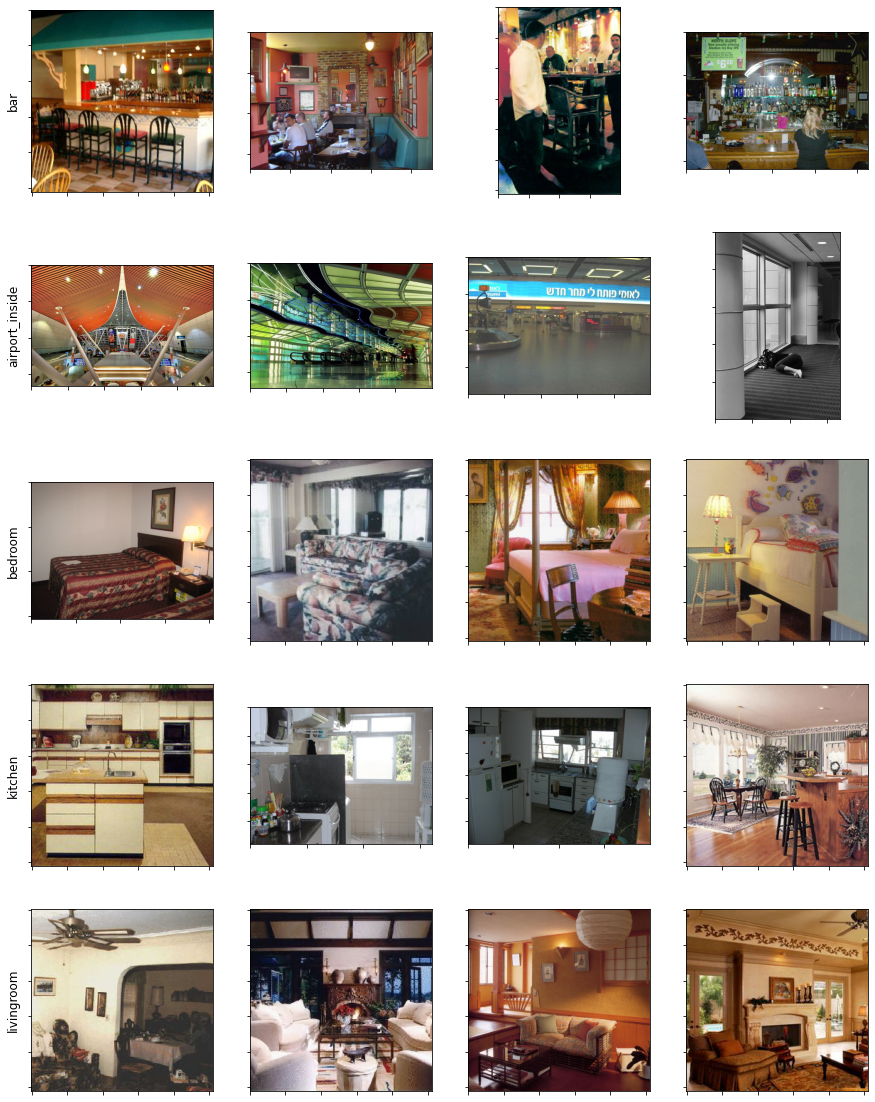

In [14]:
fig, ax = plt.subplots(5, 4, figsize = (15,20))
for row in range(5):
  category = folders[row]
  ax_row = ax[row]
  for column in range(4):
    img = plt.imread('dataset/train/' + category + '/' + files_view[row][column])
    ax_col = ax_row[column]
    ax_col.imshow(img)
    if column == 0:
      ax_col.set_ylabel(category, size = 'large')
    ax_col.set_xticklabels([])
    ax_col.set_yticklabels([])

## Etapa 4: Preparando os datasets para o uso no PyTorch

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torchvision import datasets, models
import torchvision.transforms as transforms
from datetime import datetime

In [16]:
torch.manual_seed(124)

In [17]:
path_train = 'dataset/train'
path_test = 'dataset/test'

transform = transforms.Compose([transforms.Resize([224,224]), transforms.ToTensor()])

In [18]:
train_dataset = datasets.ImageFolder(path_train, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = datasets.ImageFolder(path_test, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

## Etapa 5: Defindo o modelo e parâmetros de treinamento

In [19]:
model = models.vgg16(pretrained = True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [20]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [21]:
n_inputs = model.classifier[6].in_features
classification_layer = nn.Linear(n_inputs, len(train_dataset.classes))
model.classifier[6] = classification_layer

n_inputs, len(train_dataset.classes)

(4096, 5)

In [22]:
for param in model.features.parameters():
  param.requires_grad = False

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

## Etapa 6: Treinamento e validação

In [24]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [36]:
def train_loop(loader, epoch):

  run_loss = 0.
  run_acc = 0.

  for i, data in enumerate(loader):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()
    outputs = model(inputs)

    loss = criterion(outputs, labels)
    loss.backward()

    optimizer.step()

    run_loss += loss.item()

    # Como `output` não passou por ativação, vamos fazer isso agora usando a função `F.softmax`.
    # Em seguida, usamos `torch.argmax` para retornar o índice mais alto, que corresponde à predição.
    predicted = torch.argmax(F.softmax(outputs, dim=1), dim = 1)

    # Agora podemos ver quantas predições o modelo acertou
    equals = predicted == labels

    # A precisão será igual à média da variável anterior (número de `True` dividido pelo total)
    acc = torch.mean(equals.float())
    run_acc += acc

    # Imprimindo os dados referentes a este loop
    print('\rÉpoca {:03d} | loop {:03d}/{:03d}: perda {:.5f} - precisão {:.5f}' \
          .format(epoch + 1, i + 1, len(loader), loss.item(), acc), end='\r')
    
  # Imprimindo os dados referentes a esta época

  print('>>>>> ÉPOCA {:03d} FINALIZADA: perda {:.5f} - precisão {:.5f}' \
        .format(epoch + 1, run_loss/len(loader), run_acc/len(loader)))

In [37]:
start = datetime.now()
for epoch in range(5):
  print('\nTREINAMENTO...')
  train_loop(train_loader, epoch)
  
  model.eval()
  print('\nVALIDANDO...')
  train_loop(test_loader, epoch)

  model.train()
end = datetime.now()

print('Treinamento/Validação demorou {}'.format(end - start))


TREINAMENTO...
>>>>> ÉPOCA 001 FINALIZADA: perda 0.41734 - precisão 0.90762

VALIDANDO...
>>>>> ÉPOCA 001 FINALIZADA: perda 0.75806 - precisão 0.78727

TREINAMENTO...
>>>>> ÉPOCA 002 FINALIZADA: perda 0.23660 - precisão 0.93466

VALIDANDO...
>>>>> ÉPOCA 002 FINALIZADA: perda 0.31011 - precisão 0.90243

TREINAMENTO...
>>>>> ÉPOCA 003 FINALIZADA: perda 0.22634 - precisão 0.95174

VALIDANDO...
>>>>> ÉPOCA 003 FINALIZADA: perda 0.20886 - precisão 0.94940

TREINAMENTO...
>>>>> ÉPOCA 004 FINALIZADA: perda 0.25636 - precisão 0.94571

VALIDANDO...
>>>>> ÉPOCA 004 FINALIZADA: perda 0.17661 - precisão 0.95180

TREINAMENTO...
>>>>> ÉPOCA 005 FINALIZADA: perda 0.27035 - precisão 0.94979

VALIDANDO...
>>>>> ÉPOCA 005 FINALIZADA: perda 0.10009 - precisão 0.96875
Treinamento/Validação demorou 0:04:09.406223


## Etapa 7: Verificação

In [38]:
images, labels = next(iter(test_loader))
model.eval()
predicted = model(images.to(device)).cpu()
predicted = torch.argmax(F.softmax(predicted, dim = 1), dim = 1)
predicted

tensor([0, 2, 0, 2, 0, 3, 2, 4, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 4, 2, 1, 4, 3, 2,
        3, 4, 3, 2, 2, 4, 4, 0])

In [39]:
test_dataset.class_to_idx

{'airport_inside': 0, 'bar': 1, 'bedroom': 2, 'kitchen': 3, 'livingroom': 4}

In [40]:
idx_class = {k:v for v, k in test_dataset.class_to_idx.items()}
idx_class

{0: 'airport_inside', 1: 'bar', 2: 'bedroom', 3: 'kitchen', 4: 'livingroom'}

In [41]:
labels, predicted = labels.detach().numpy(), predicted.detach().numpy()

In [42]:
labels = [idx_class[label] for label in labels]
predicted = [ idx_class[label] for label in predicted]

labels, predicted

(['airport_inside',
  'bedroom',
  'airport_inside',
  'bedroom',
  'airport_inside',
  'kitchen',
  'bedroom',
  'livingroom',
  'bedroom',
  'airport_inside',
  'bar',
  'livingroom',
  'bar',
  'livingroom',
  'livingroom',
  'bedroom',
  'bedroom',
  'bedroom',
  'livingroom',
  'livingroom',
  'bar',
  'livingroom',
  'kitchen',
  'bedroom',
  'kitchen',
  'livingroom',
  'kitchen',
  'bedroom',
  'livingroom',
  'livingroom',
  'livingroom',
  'airport_inside'],
 ['airport_inside',
  'bedroom',
  'airport_inside',
  'bedroom',
  'airport_inside',
  'kitchen',
  'bedroom',
  'livingroom',
  'bedroom',
  'airport_inside',
  'bar',
  'bar',
  'bar',
  'bedroom',
  'bar',
  'bedroom',
  'bedroom',
  'bedroom',
  'livingroom',
  'bedroom',
  'bar',
  'livingroom',
  'kitchen',
  'bedroom',
  'kitchen',
  'livingroom',
  'kitchen',
  'bedroom',
  'bedroom',
  'livingroom',
  'livingroom',
  'airport_inside'])

In [44]:
images.shape

torch.Size([32, 3, 224, 224])

In [45]:
images = images.permute(0, 2, 3, 1).numpy()

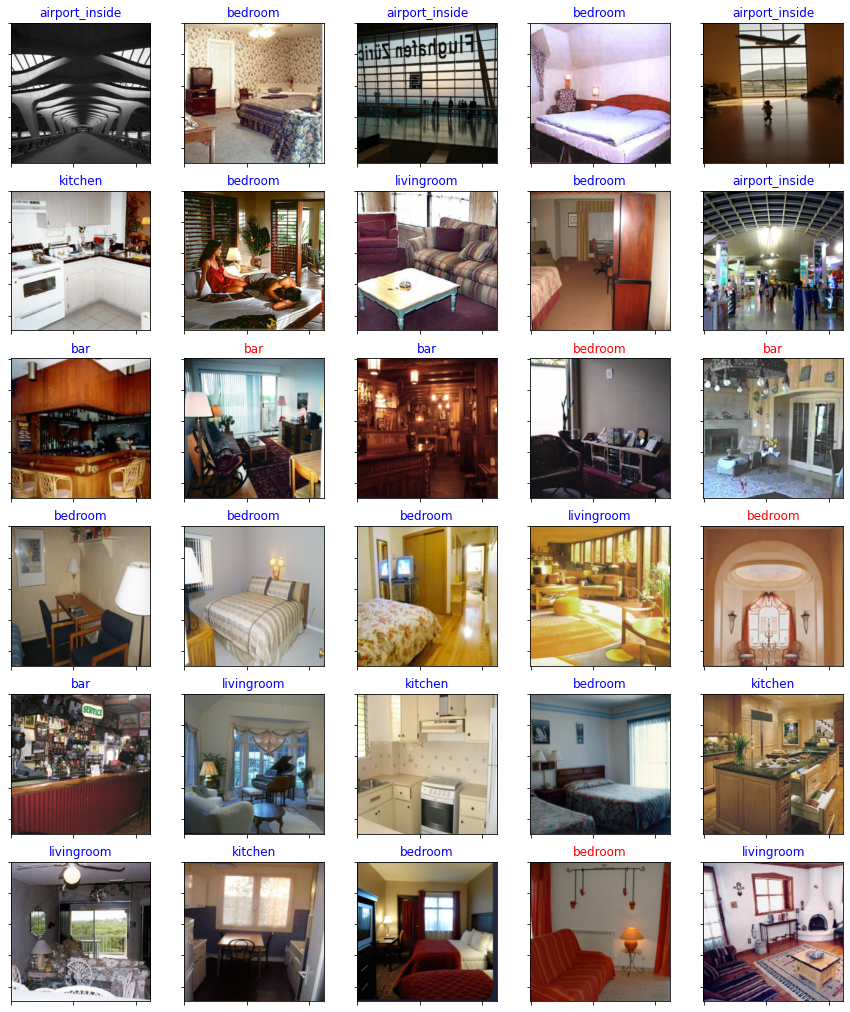

In [46]:
fig, ax = plt.subplots(6, 5, figsize=(15, 18))
i = 0
for row in range(6):
  ax_row = ax[row]
  for column in range(5):
    ax_col = ax_row[column]
    ax_col.imshow(images[i])
    ax_col.set_xticklabels([])
    ax_col.set_yticklabels([])
    col = 'blue' if labels[i] == predicted[i] else 'red'
    ax_col.set_title(predicted[i], color = col)
    i+=1